In [1]:
from pathlib import Path
import rdkit
from rdkit import Chem
from rdkit.Chem.rdmolfiles import SDMolSupplier
from rdkit.Chem.rdMolAlign import AlignMol
import matplotlib.pyplot as plt
import pickle
from pymol import cmd
import pandas as pd

In [2]:
def save_best_pose(sdf_file, new_file):
    all_poses = SDMolSupplier(sdf_file)
    best_pose = all_poses[0]
    Chem.MolToMolFile(best_pose, new_file)
    return None
    

In [78]:
for p in pdb_docks:
    save_best_pose(
    f'../redocked_pdbbind_2020_general/{p}_redocking-results.sdf',
    f'../pdbbind_2020_general/{p}/{p}_redocking_best_pose.sdf'   
    )
for p in casf_pdbs:
    save_best_pose(
    f'../redocked_pdbbind_2020_general/{p}_redocking-results.sdf',
    f'../pdbbind_2020_general/{p}/{p}_redocking_best_pose.sdf'   
    )

In [3]:
casf_pdbs = []
with open('casf_2016_ids.txt') as f:
    for line in f:
        casf_pdbs.append(line[:4])
casf_pdbs[:5]

['1a30', '1bcu', '1bzc', '1c5z', '1e66']

In [4]:
structure_most_similiar_dict = pickle.load(open('casf_most_similiar_crossdock_dict', 'rb'))
structure_least_similiar_dict = pickle.load(open('casf_least_similiar_crossdock_dict', 'rb'))
ligand_most_similiar_dict = pickle.load(open('casf_most_similiar_crossdock_dict', 'rb'))
ligand_least_similiar_dict = pickle.load(open('casf_least_similiar_crossdock_dict', 'rb'))

In [5]:
for p in casf_pdbs:
    save_best_pose(
    f'../crossdocks_casf_2016/{p}_crossdocking_into_{structure_most_similiar_dict[p]}-results.sdf',
    f'../pdbbind_2020_general/{p}/{p}_crossdocking_most_structure_similiar_best_pose.sdf'   
    )
    save_best_pose(
    f'../crossdocks_casf_2016/{p}_crossdocking_into_{structure_least_similiar_dict[p]}-results.sdf',
    f'../pdbbind_2020_general/{p}/{p}_crossdocking_least_structure_similiar_best_pose.sdf'   
    )
    save_best_pose(
    f'../crossdocks_casf_2016/{p}_crossdocking_into_{ligand_most_similiar_dict[p]}-results.sdf',
    f'../pdbbind_2020_general/{p}/{p}_crossdocking_most_ligand_similiar_best_pose.sdf'   
    )
    save_best_pose(
    f'../crossdocks_casf_2016/{p}_crossdocking_into_{ligand_least_similiar_dict[p]}-results.sdf',
    f'../pdbbind_2020_general/{p}/{p}_crossdocking_least_ligand_similiar_best_pose.sdf'   
    )

# PDBBind 2020 General Redocks 

In [4]:
pdbs = []
with open('pdbbind_2020_general_cleaned_ids.txt') as f:
    for line in f:
        pdbs.append(line[:4])
print(f' There are {len(pdbs)} PDBBind structures')

 There are 15069 PDBBind structures


In [5]:
pdb_docks = pdbs[:]

for p in pdbs:
    if p in casf_pdbs:
        pdb_docks.remove(p)
    else:
        try: 
            all_poses = SDMolSupplier(f'../redocked_pdbbind_2020_general/{p}_redocking-results.sdf')
        except:
            pdb_docks.remove(p)
            print(p)

print(f'\nThere are {len(pdb_docks)} PDBBind structures')
# These are the proteins that couldn't be docked 

2bow
5kat
3lkj
5dhr
4r5g
6bqj
4mdn
3wd2
5dhu
5etx
4acu
4x6h
2cen
6bqk
5lp1

There are 14780 PDBBind structures


In [75]:
casf_pdbs.index('3uri')

198

In [6]:
with open('pdbbind_2020_general_cleaned_ids_wout_undocked.txt', 'w') as f:
    for p in pdb_docks:
        f.write(p + '\n')

In [58]:
# Isolate best pose and calculate RMSD 
failure = []
rmsds = {}

for p in pdb_docks:     
    try:
        all_poses = SDMolSupplier(f'../pdbbind_2020_general/{p}/{p}_redocking_best_pose.sdf')
        best_pose = all_poses[0]
        crystal_pose = next(Chem.SDMolSupplier(f'../pdbbind_2020_general/{p}/{p}_ligand.sdf'))
        if crystal_pose == None:
            crystal_pose = Chem.MolFromMol2File(f'../pdbbind_2020_general/{p}/{p}_ligand.mol2', removeHs=False)
        rmsds[p] = AlignMol(best_pose, crystal_pose, maxIters=0)
    except:
        failure.append(p)

RDKit ERROR: [06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 16 17 18
[06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 16 17 18

[06:27:53] Can't kekulize mol.  Unkekulized atoms: 3 7 8 10 11 13 14 15 16

RDKit ERROR: 
RDKit ERROR: [06:27:53] Can't kekulize mol.  Unkekulized atoms: 3 7 8 10 11 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [06:27:53] ERROR: Could not sanitize molecule ending on line 66
[06:27:53] ERROR: Could not sanitize molecule ending on line 66
RDKit ERROR: [06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 7 8 10 11 13 14 15 16
[06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 7 8 10 11 13 14 15 16

[06:27:53] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

RDKit ERROR: 
RDKit ERROR: [06:27:53] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [06:27:53] ERROR: Could not sanitize molecule ending on line 60
[06:27:53] ERROR: Could not sanitize molecul

RDKit ERROR: [06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 10 12
[06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 10 12

[06:27:53] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13

RDKit ERROR: 
RDKit ERROR: [06:27:53] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [06:27:53] ERROR: Could not sanitize molecule ending on line 52
RDKit ERROR: [06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [06:27:53] Can't kekulize mol.  Unkekulized atoms: 2 3 4 8 9
RDKit ERROR: 
RDKit ERROR: [06:27:53] ERROR: Could not sanitize molecule ending on line 55
[06:27:53] ERROR: Could not sanitize molecule ending on line 52
[06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13

[06:27:53] Can't kekulize mol.  Unkekulized atoms: 2 3 4 8 9

[06:27:53] ERROR: Could not sanitize molecule ending on line 55
RDKit ERROR: [06:27:53] ERROR: Can't kekulize mol.  Un

[06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 11 12 13 14 15 16

[06:27:53] Explicit valence for atom # 0 Cl, 3, is greater than permitted
[06:27:53] ERROR: Could not sanitize molecule ending on line 35
RDKit ERROR: [06:27:53] ERROR: Explicit valence for atom # 0 Cl, 3, is greater than permitted
RDKit ERROR: [06:27:53] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [06:27:53] ERROR: Could not sanitize molecule ending on line 89
[06:27:53] ERROR: Explicit valence for atom # 0 Cl, 3, is greater than permitted
[06:27:53] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20

[06:27:53] ERROR: Could not sanitize molecule ending on line 89
RDKit ERROR: [06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20
[06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20

[06:27:53] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

RDKit ERROR: 
RDKit ERROR

[06:27:53] ERROR: Could not sanitize molecule ending on line 75
RDKit ERROR: [06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13
RDKit ERROR: 
[06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13

[06:27:53] Can't kekulize mol.  Unkekulized atoms: 1 16 17 18 19

RDKit ERROR: [06:27:53] Can't kekulize mol.  Unkekulized atoms: 1 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:27:53] ERROR: Could not sanitize molecule ending on line 77
RDKit ERROR: [06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 16 17 18 19
RDKit ERROR: 
[06:27:53] ERROR: Could not sanitize molecule ending on line 77
[06:27:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 16 17 18 19

[06:27:53] Can't kekulize mol.  Unkekulized atoms: 1 16 17 18 19

RDKit ERROR: [06:27:53] Can't kekulize mol.  Unkekulized atoms: 1 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:27:53] ERROR: Could not sanitize molecule ending on line 77
RDKit ERROR: [06:27:53] ERROR: Can't kekulize mol.  Unkeku

RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 6 7 10 11 25
RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 35
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 6 7 10 11 25

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

[06:27:54] ERROR: Could not sanitize molecule ending on line 35
RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9

RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 61
[06:27:54] ERROR: Could not sanitize molecule ending on line 61
RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  

RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 23 25 27 35 36 37 38

RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 23 25 27 35 36 37 38
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 158
[06:27:54] ERROR: Could not sanitize molecule ending on line 158
RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 23 25 27 35 36 37 38
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 23 25 27 35 36 37 38

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 2 6 9 15 16

RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 2 6 9 15 16
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 74
[06:27:54] ERROR: Could not sanitize molecule ending on line 74
RDKit ERROR: [06:27:54] ERROR: Can't kek

[06:27:54] ERROR: Could not sanitize molecule ending on line 51
RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 48
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 10 11

RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 48
[06:27:54] ERROR: Could not sanitize molecule ending on line 48
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 10 11

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12

[06:27:54] ERROR: Could not 

RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 4 5 6 7 9 10 11 12

RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 4 5 6 7 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 40
RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 4 5 6 7 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 66
[06:27:54] ERROR: Could not sanitize molecule ending on line 40
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 4 5 6 7 9 10 11 12

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15

[06:27:54] ERROR: Could not sanitize molecule ending on line 66
RDKit ERROR: [06:27:54] ER

RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 8 9 10 11 13 14 15
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 8 9 10 11 13 14 15

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 65
RDKit ERROR: [06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5 6 7 8 11
RDKit ERROR: 
RDKit ERROR: [06:27:54] ERROR: Could not sanitize molecule ending on line 59
[06:27:54] ERROR: Could not sanitize molecule ending on line 65
[06:27:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

[06:27:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5 6 7 8 11

[06:27:54] ERROR: Could not sanitize molecule ending on line 59
RDKit 

[06:27:55] ERROR: Could not sanitize molecule ending on line 42
RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 65
RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
[06:27:55] ERROR: Could not sanitize molecule ending on line 65
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4

RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 64
RDKit ERROR: [06:27:55] ERROR: Can

RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5 6 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 104
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5 6 9 10 11

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 8 9 10

[06:27:55] ERROR: Could not sanitize molecule ending on line 104
RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 13 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 151
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 8 9 10

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 13 17 18 19 20

[06:27:55] ERROR: Could not sanitize molecule ending on line 151
RDKit ERROR: [06:27:

RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 11 12 13 16 17
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 11 12 13 16 17

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 13 14 15 16 17

RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 102
[06:27:55] ERROR: Could not sanitize molecule ending on line 102
RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 13 14 15 16 17
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 13 14 15 16 17

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 8 9

RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 8 9
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 34
[06:27:55] ERROR: Could not sanitize molecule ending on line 34
RDKit ERROR: [

RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 42
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 13 14

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 13 14 15 16

[06:27:55] ERROR: Could not sanitize molecule ending on line 70
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 13 14 15 16

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9

[06:27:55] ERROR: Could not sanitize molecule ending on line 42
RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 9

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 9 10 12 13 14

RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 9 10 12 13 14
RDKi

[06:27:55] ERROR: Could not sanitize molecule ending on line 40
RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 69
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9

RDKit ERROR: [06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
[06:27:55] ERROR: Could not sanitize molecule ending on line 69
RDKit ERROR: 
RDKit ERROR: [06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:55] ERROR: Could not sanitize molecule ending on line 67
[06:27:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9

[06:27:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

[06:27:55] ERROR: Coul

RDKit ERROR: [06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14
[06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14

[06:27:56] non-ring atom 0 marked aromatic
RDKit ERROR: 
RDKit ERROR: [06:27:56] non-ring atom 0 marked aromatic
RDKit ERROR: [06:27:56] ERROR: Could not sanitize molecule ending on line 120
RDKit ERROR: [06:27:56] ERROR: non-ring atom 0 marked aromatic
RDKit ERROR: [06:27:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[06:27:56] ERROR: Could not sanitize molecule ending on line 120
[06:27:56] ERROR: non-ring atom 0 marked aromatic
[06:27:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4

RDKit ERROR: 
RDKit ERROR: [06:27:56] ERROR: Could not sanitize molecule ending on line 64
[06:27:56] ERROR: Could not sanitize molecule ending on line 64
RDKit ERROR: [06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
[06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4

[06:27:56] Can't

RDKit ERROR: [06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 8 9 10 11 12
[06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 8 9 10 11 12

[06:27:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 10 11 12

RDKit ERROR: 
RDKit ERROR: [06:27:56] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 10 11 12
RDKit ERROR: 
RDKit ERROR: [06:27:56] ERROR: Could not sanitize molecule ending on line 108
[06:27:56] ERROR: Could not sanitize molecule ending on line 108
RDKit ERROR: [06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 10 11 12
[06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 10 11 12

[06:27:56] Can't kekulize mol.  Unkekulized atoms: 0 11 15 16 17 18 19 20 22

RDKit ERROR: 
RDKit ERROR: [06:27:56] Can't kekulize mol.  Unkekulized atoms: 0 11 15 16 17 18 19 20 22
RDKit ERROR: 
RDKit ERROR: [06:27:56] ERROR: Could not sanitize molecule ending on line 113
[06:27:56] ERROR: Could not sanitize molecule ending 

[06:27:56] ERROR: Could not sanitize molecule ending on line 116
RDKit ERROR: [06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:27:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:27:56] ERROR: Could not sanitize molecule ending on line 99
[06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:27:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:27:56] ERROR: Could not sanitize molecule ending on line 99
RDKit ERROR: [06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:27:56] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 27 28 29 30 31

RDKit ERROR: 
RDKit ERROR: [06:27:56] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 27 28 29 30 31
RDKit ERROR: 
RDKit ERROR: [06:27:56] ERROR: Could not sanitize molecule ending on line 124
[06:27

[06:27:56] ERROR: Could not sanitize molecule ending on line 107
RDKit ERROR: [06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 24 25 26 27 28
[06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 24 25 26 27 28

[06:27:56] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12

RDKit ERROR: 
RDKit ERROR: [06:27:56] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [06:27:56] ERROR: Could not sanitize molecule ending on line 57
[06:27:56] ERROR: Could not sanitize molecule ending on line 57
RDKit ERROR: [06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[06:27:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12

[06:27:56] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7

RDKit ERROR: 
RDKit ERROR: [06:27:56] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7
RDKit ERROR: 
RDKit ERROR: [06:27:56] ERROR: Could not sanitize molecule ending on line 37
RDKit ERROR: [06:27:56] ERROR: Can't kekuli

[06:27:57] ERROR: Could not sanitize molecule ending on line 86
RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 4 7 17 19
RDKit ERROR: 
RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 1 17 18 25 26
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 120
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 4 7 17 19

[06:27:57] Can't kekulize mol.  Unkekulized atoms: 1 17 18 25 26

[06:27:57] ERROR: Could not sanitize molecule ending on line 120
RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 17 18 25 26
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 17 18 25 26

[06:27:57] Can't kekulize mol.  Unkekulized atoms: 16 17 18 23 24

RDKit ERROR: 
RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 16 17 18 23 24
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 71
[06:27:57] ERROR: Could not sanitize molecule ending on li

RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 13 14
[06:27:57] ERROR: Could not sanitize molecule ending on line 53
RDKit ERROR: 
RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 0 4 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 85
RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 4 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 271
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 13 14

[06:27:57] Can't kekulize mol.  Unkekulized atoms: 0 4 6 7 8 9

[06:27:57] ERROR: Could not sanitize molecule ending on line 85
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 4 6 7 8 9

[06:27:57] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9

[06:27:57] ERROR: Could not sanitize molecule ending on line 

[06:27:57] ERROR: Could not sanitize molecule ending on line 84
RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 15 16 17
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 15 16 17

[06:27:57] non-ring atom 7 marked aromatic
RDKit ERROR: 
RDKit ERROR: [06:27:57] non-ring atom 7 marked aromatic
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 100
[06:27:57] ERROR: Could not sanitize molecule ending on line 100
RDKit ERROR: [06:27:57] ERROR: non-ring atom 7 marked aromatic
[06:27:57] ERROR: non-ring atom 7 marked aromatic
[06:27:57] Can't kekulize mol.  Unkekulized atoms: 6 9 12 14 15

RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 6 9 12 14 15
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 65
[06:27:57] ERROR: Could not sanitize molecule ending on line 65
RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 9 12 14 15
RDKit ERROR: 
RDKit ERROR: [06

RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 20 21
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 112
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4

[06:27:57] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 20 21

[06:27:57] ERROR: Could not sanitize molecule ending on line 112
RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 20 21
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 20 21

[06:27:57] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18

RDKit ERROR: 
RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 68
[06:27:57] ERROR: Could not sanitize mol

RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9

[06:27:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 13 15 16

RDKit ERROR: 
RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 13 15 16
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 56
[06:27:57] ERROR: Could not sanitize molecule ending on line 56
RDKit ERROR: [06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 13 15 16
[06:27:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 13 15 16

[06:27:57] Can't kekulize mol.  Unkekulized atoms: 5 7 10 13 14 15

RDKit ERROR: 
RDKit ERROR: [06:27:57] Can't kekulize mol.  Unkekulized atoms: 5 7 10 13 14 15
RDKit ERROR: 
RDKit ERROR: [06:27:57] ERROR: Could not sanitize molecule ending on line 63
RDKit ERROR: [06:27:57] ER

[06:27:58] ERROR: Could not sanitize molecule ending on line 96
RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 13 14 16 17 18 19 20
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 13 14 16 17 18 19 20

[06:27:58] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11

RDKit ERROR: 
RDKit ERROR: [06:27:58] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 89
RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:58] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22 23 24 25 26
RDKit ERROR: 
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 118
[06:27:58] ERROR: Could not sanitize molecule ending on line 89
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11

[06:27:58] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 2

RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:27:58] Can't kekulize mol.  Unkekulized atoms: 3 4 5 18 19
RDKit ERROR: 
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 87
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:27:58] Can't kekulize mol.  Unkekulized atoms: 3 4 5 18 19

[06:27:58] ERROR: Could not sanitize molecule ending on line 87
RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 18 19
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 18 19

[06:27:58] Can't kekulize mol.  Unkekulized atoms: 9 11 12 15 21 22 23

RDKit ERROR: 
RDKit ERROR: [06:27:58] Can't kekulize mol.  Unkekulized atoms: 9 11 12 15 21 22 23
RDKit ERROR: 
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 100
[06:27:58] ERROR: Could not sanitize molecule ending on line 100
RDKit ERROR: [06:27:58] ERROR: Can't kekuliz

RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 17 18
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 17 18

[06:27:58] non-ring atom 2 marked aromatic
RDKit ERROR: 
RDKit ERROR: [06:27:58] non-ring atom 2 marked aromatic
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 122
[06:27:58] ERROR: Could not sanitize molecule ending on line 122
RDKit ERROR: [06:27:58] ERROR: non-ring atom 2 marked aromatic
[06:27:58] ERROR: non-ring atom 2 marked aromatic
[06:27:58] Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 8 9 10 11 12

RDKit ERROR: [06:27:58] Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 98
[06:27:58] ERROR: Could not sanitize molecule ending on line 98
RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 8 9 10 11 12
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 4 6 8 9 10

RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

[06:27:58] Can't kekulize mol.  Unkekulized atoms: 43 44 45 46 47 48 49 50 51

RDKit ERROR: 
RDKit ERROR: [06:27:58] Can't kekulize mol.  Unkekulized atoms: 43 44 45 46 47 48 49 50 51
RDKit ERROR: 
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 210
RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 43 44 45 46 47 48 49 50 51
RDKit ERROR: 
RDKit ERROR: [06:27:58] non-ring atom 14 marked aromatic
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 118
[06:27:58] ERROR: Could not sanitize molecule ending on line 210
RDKit ERROR: [06:27:58] ERROR: non-ring atom 14 marked aromatic
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 43 44 45 46 47 48 49 50 51

[06:27:58] non-ring atom 14 marked aromatic
[06:27:58] ERROR: Could not sanitize molecule en

[06:27:58] ERROR: Could not sanitize molecule ending on line 119
RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15
[06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15

[06:27:58] Can't kekulize mol.  Unkekulized atoms: 0 1 14 15 17 18 19 20 21

RDKit ERROR: 
RDKit ERROR: [06:27:58] Can't kekulize mol.  Unkekulized atoms: 0 1 14 15 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 106
[06:27:58] ERROR: Could not sanitize molecule ending on line 106
RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 14 15 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [06:27:58] Can't kekulize mol.  Unkekulized atoms: 1 2 3 21 22
RDKit ERROR: 
RDKit ERROR: [06:27:58] ERROR: Could not sanitize molecule ending on line 83
RDKit ERROR: [06:27:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 21 22
RDKit ERROR: 
RDKit ERROR: [06:27:58] Can't kekulize mol.  U

RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 14 15
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 14 15

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10

RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 81
[06:27:59] ERROR: Could not sanitize molecule ending on line 81
RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 21

RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 21
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 100
[06:27:59] ERROR: Could not sanitize molecule ending on line 100
RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unke

RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 13 14 15 16 17 18
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 13 14 15 16 17 18

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11

RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 54
RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 64
[06:27:59] ERROR: Could not sanitize molecule ending on line 54
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16

[06:27:59] ERROR: Could not sanitize molecule ending on line 64
RDKit ERROR:

[06:27:59] ERROR: Could not sanitize molecule ending on line 120
RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 6 7 8 21
RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 13 14 19 24 25
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 116
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 6 7 8 21

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 13 14 19 24 25

[06:27:59] ERROR: Could not sanitize molecule ending on line 116
RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 19 24 25
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 19 24 25

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9

RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 98
[06:27:59] ERROR: Could not sanitize molecule end

RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 15 16 17 18 19 21 22 23
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 15 16 17 18 19 21 22 23

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 2 15 16 17 18

RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 2 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 100
[06:27:59] ERROR: Could not sanitize molecule ending on line 100
RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 15 16 17 18
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 15 16 17 18

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16

RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 85
[06:27:59] ERROR: Could not sanitize molecule ending on line 85
RDKit ERROR: [06:27:59] ERRO

RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 29 30 31 32 33 34 35 36 37
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 29 30 31 32 33 34 35 36 37

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 21

RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 21
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 71
[06:27:59] ERROR: Could not sanitize molecule ending on line 71
RDKit ERROR: [06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 21
RDKit ERROR: 
RDKit ERROR: [06:27:59] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:27:59] ERROR: Could not sanitize molecule ending on line 103
[06:27:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 21

[06:27:59] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11

[06:27:59] ERROR: Could not sanitize molecule ending on line 103
RDKit ERROR: [06:27:59] ERROR: Can't kekulize 

[06:28:00] ERROR: Could not sanitize molecule ending on line 136
RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 5 7 12 26
RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 1 3 4 7 16 17 18 20 21
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 133
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 5 7 12 26

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 1 3 4 7 16 17 18 20 21

[06:28:00] ERROR: Could not sanitize molecule ending on line 133
RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 3 4 7 16 17 18 20 21
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 3 4 7 16 17 18 20 21

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 6 7 8 13 14

RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 6 7 8 13 14
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 53
[06:28:00] 

RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 12 13 14 15
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 12 13 14 15

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 6 7 8 9 10

RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 66
[06:28:00] ERROR: Could not sanitize molecule ending on line 66
RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 22 23 24 25 26
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 116
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 6 7 8 9 10

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 22 23 24 25 26

[06:28:00] ERROR: Could not sanitize molecule ending on line 116
RDKit ERROR: [06:2

RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 8 9 10 14

RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 8 9 10 14
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 57
RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 8 9 10 14
[06:28:00] ERROR: Could not sanitize molecule ending on line 57
RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 2 6 10 11 12
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 69
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 8 9 10 14

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 2 6 10 11 12

[06:28:00] ERROR: Could not sanitize molecule ending on line 69
RDKit ERROR: [06:28:00] ERROR:

RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 19 20 21 22 23 24
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 19 20 21 22 23 24

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23

RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 81
[06:28:00] ERROR: Could not sanitize molecule ending on line 81
RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 26 27 28 29 30

RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 26 27 28 29 30
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 124
RDKit ERROR: [06:28:00]

[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 16 17 18 19

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10 11 12 14 15 16

[06:28:00] ERROR: Could not sanitize molecule ending on line 72
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10 11 12 14 15 16

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23

[06:28:00] ERROR: Could not sanitize molecule ending on line 87
RDKit ERROR: [06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23
RDKit ERROR: 
RDKit ERROR: [06:28:00] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [06:28:00] ERROR: Could not sanitize molecule ending on line 87
[06:28:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23

[06:28:00] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22

[06:28:00] ERROR: Could not sanitize molecule ending on line 87
RDKit ERROR: [06:28:00] ERROR: Can't k

[06:28:01] ERROR: Could not sanitize molecule ending on line 89
RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21 22 23

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 5 24 25 26 27

RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 5 24 25 26 27
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 101
RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 24 25 26 27
RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 83
[06:28:01] ERROR: Could not sanitize molecule ending on line 101
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 24 25 26 27

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20

[06:28:01] ERROR: Could not 

RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18 24 25
RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 18
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 122
[06:28:01] ERROR: Could not sanitize molecule ending on line 99
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21 22 23 24 25

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18 24 25

[06:28:01] ERROR: Could not sanitize molecule ending on line 104
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18 24 25

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 18

[06:28:01] ERROR: Could not sanitize molecule ending on line 122
RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 18
RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 3 6 14 15 16 18 20 26 2

[06:28:01] ERROR: Could not sanitize molecule ending on line 170
RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 34 35 36
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 34 35 36

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 6 10 11 12 18 19 23 25 26

RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 6 10 11 12 18 19 23 25 26
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 101
[06:28:01] ERROR: Could not sanitize molecule ending on line 101
RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 10 11 12 18 19 23 25 26
RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 9 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 92
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 10 11 12 18 19 23 25 26

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 0 

RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 9 10 11 17 18
RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 0 5 6 8 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 83
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 9 10 11 17 18

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 0 5 6 8 15 16 17 18 19

RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 5 6 8 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 5 6 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 109
RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 0 2 6 9 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 80
[06:28:01] ERR

[06:28:01] ERROR: Could not sanitize molecule ending on line 133
RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 27 28 29 30 36
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 27 28 29 30 36

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 112
RDKit ERROR: [06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:28:01] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:28:01] ERROR: Could not sanitize molecule ending on line 91
[06:28:01] ERROR: Could not sanitize molecule ending on line 112
[06:28:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

[06:28:01] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10

[06:28:01] ERROR: Could not sanitize molecu

RDKit ERROR: [06:28:02] ERROR: Explicit valence for atom # 0 C greater than permitted
[06:28:02] ERROR: Explicit valence for atom # 0 C greater than permitted
[06:28:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 125
RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
[06:28:02] ERROR: Could not sanitize molecule ending on line 125
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7

RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 76
[06:28:02] ERROR: Could not sanitize molecule ending on line 76
RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  U

RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 28 29 30 31 32 33 34 35
RDKit ERROR: 
RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 92
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 28 29 30 31 32 33 34 35

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:28:02] ERROR: Could not sanitize molecule ending on line 92
RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 7
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 139
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 7

RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 7
RDKit ER

RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15 16 17 18 22
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15 16 17 18 22

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20

RDKit ERROR: 
RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 81
[06:28:02] ERROR: Could not sanitize molecule ending on line 81
RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17

RDKit ERROR: 
RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 125
[06:28:02] ERROR: Could not sanitize molecule ending on line 125
RD

RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 11 17 18 19 20 21
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 11 17 18 19 20 21

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 31 32

RDKit ERROR: 
RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 3 4 5 31 32
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 114
RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 31 32
RDKit ERROR: 
RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 91
[06:28:02] ERROR: Could not sanitize molecule ending on line 114
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 31 32

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17

[06:28:02] ERROR: Could not sanitize molecule ending on line 91
RDKit ERROR:

RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 5 7 8 10 18 20
RDKit ERROR: 
RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 4 5 6 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 153
RDKit ERROR: [06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [06:28:02] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:02] ERROR: Could not sanitize molecule ending on line 66
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 8 9 10 11 12 13 14 34

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 0 1 3 5 7 8 10 18 20

[06:28:02] ERROR: Could not sanitize molecule ending on line 87
[06:28:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 5 7 8 10 18 20

[06:28:02] Can't kekulize mol.  Unkekulized atoms: 4 5 6 17 18 19 20 21 22

[06:28:02] ERROR: Could not sanitize molecule e

RDKit ERROR: [06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 12 14 15 16
[06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 12 14 15 16

[06:28:03] Can't kekulize mol.  Unkekulized atoms: 3 4 7 9 10 11 15 24 25

RDKit ERROR: 
RDKit ERROR: [06:28:03] Can't kekulize mol.  Unkekulized atoms: 3 4 7 9 10 11 15 24 25
RDKit ERROR: 
RDKit ERROR: [06:28:03] ERROR: Could not sanitize molecule ending on line 115
[06:28:03] ERROR: Could not sanitize molecule ending on line 115
RDKit ERROR: [06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 7 9 10 11 15 24 25
[06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 7 9 10 11 15 24 25

[06:28:03] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 14

RDKit ERROR: 
RDKit ERROR: [06:28:03] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 14
RDKit ERROR: 
RDKit ERROR: [06:28:03] ERROR: Could not sanitize molecule ending on line 96
[06:28:03] ERROR: Could not sanitize molecule ending on line 96
RDKit ERROR: [06:28:03] ER

RDKit ERROR: [06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 3 21 22 23 24 25 26 27
RDKit ERROR: 
RDKit ERROR: [06:28:03] Can't kekulize mol.  Unkekulized atoms: 2 7 8 9 10 11 12 14 16
RDKit ERROR: 
RDKit ERROR: [06:28:03] ERROR: Could not sanitize molecule ending on line 71
[06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 3 21 22 23 24 25 26 27

[06:28:03] Can't kekulize mol.  Unkekulized atoms: 2 7 8 9 10 11 12 14 16

[06:28:03] ERROR: Could not sanitize molecule ending on line 71
RDKit ERROR: [06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 7 8 9 10 11 12 14 16
RDKit ERROR: 
RDKit ERROR: [06:28:03] Can't kekulize mol.  Unkekulized atoms: 26 27 28 29 30 31 32 33 34
RDKit ERROR: 
RDKit ERROR: [06:28:03] ERROR: Could not sanitize molecule ending on line 132
[06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 7 8 9 10 11 12 14 16

[06:28:03] Can't kekulize mol.  Unkekulized atoms: 26 27 28 29 30 31 32 33 34

[06:28:03] ERROR: Could not sanitize 

RDKit ERROR: [06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:28:03] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [06:28:03] ERROR: Could not sanitize molecule ending on line 106
[06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 8 9 10 11

[06:28:03] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17

RDKit ERROR: [06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [06:28:03] Can't kekulize mol.  Unkekulized atoms: 9 10 12 13 14 15 16 23 24
RDKit ERROR: 
RDKit ERROR: [06:28:03] ERROR: Could not sanitize molecule ending on line 109
[06:28:03] ERROR: Could not sanitize molecule ending on line 106
[06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17

[06:28:03] Can't kekulize mol.  Unkekulized atoms: 9 10 12 13 14 15 16 23 24

[06:28:03] ERROR: Could not sanitize molecule endin

[06:28:03] ERROR: Could not sanitize molecule ending on line 80
RDKit ERROR: [06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 15 16 17 18
[06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 15 16 17 18

[06:28:03] Can't kekulize mol.  Unkekulized atoms: 4 5 34 35 36 37 38 39 40

RDKit ERROR: 
RDKit ERROR: [06:28:03] Can't kekulize mol.  Unkekulized atoms: 4 5 34 35 36 37 38 39 40
RDKit ERROR: 
RDKit ERROR: [06:28:03] ERROR: Could not sanitize molecule ending on line 174
RDKit ERROR: [06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 34 35 36 37 38 39 40
RDKit ERROR: 
RDKit ERROR: [06:28:03] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:28:03] ERROR: Could not sanitize molecule ending on line 98
[06:28:03] ERROR: Could not sanitize molecule ending on line 174
[06:28:03] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 34 35 36 37 38 39 40

[06:28:03] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3

RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 24
[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 24

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 13 28 29 30 31

RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 13 28 29 30 31
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 138
[06:28:04] ERROR: Could not sanitize molecule ending on line 138
RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 28 29 30 31
[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 28 29 30 31

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 3 4 5 10 11 12 13 14 15

RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 3 4 5 10 11 12 13 14 15
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 65
[06:28:04] ERROR: Could not sanitize molecule ending on line 65
RDKit ERROR: [06:28:04] ERROR:

[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 3 4 5 6

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 30

[06:28:04] ERROR: Could not sanitize molecule ending on line 117
RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 30
RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 35 36 37 38 39
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 144
[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 30

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 35 36 37 38 39

[06:28:04] ERROR: Could not sanitize molecule ending on line 144
RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 35 36 37 38 39
RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 27
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 104
[06:28:04] ERROR: Can't kekulize mol.  

RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 7 9 17 18 19 20 21 22 23

RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 7 9 17 18 19 20 21 22 23
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 109
RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 9 17 18 19 20 21 22 23
RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 11 12 13 17 18
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 79
[06:28:04] ERROR: Could not sanitize molecule ending on line 109
[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 9 17 18 19 20 21 22 23

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 11 12 13 17 18

[06:28:04] ERROR: Could not sanitize molecule ending on line 79
RDKit ER

RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 21 22 23 25 26 27
RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 2 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 113
[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 21 22 23 25 26 27

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 2 4 5 6 7 8

[06:28:04] ERROR: Could not sanitize molecule ending on line 113
RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 98
[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 4 5 6 7 8

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 10 11 12 13

[06:28:04] ERROR: Could not sanitize molecule ending on line 98
RDKit ERROR: [06:28:04] 

[06:28:04] ERROR: Could not sanitize molecule ending on line 107
RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 21 22 23 24 25 26
[06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 21 22 23 24 25 26

[06:28:04] Can't kekulize mol.  Unkekulized atoms: 4 5 8 9 10 11 12 13 14 15 16 17 18 24 25 26 27

RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 4 5 8 9 10 11 12 13 14 15 16 17 18 24 25 26 27
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 85
RDKit ERROR: [06:28:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 8 9 10 11 12 13 14 15 16 17 18 24 25 26 27
RDKit ERROR: 
RDKit ERROR: [06:28:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 14 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [06:28:04] ERROR: Could not sanitize molecule ending on line 66
[06:28:04] ERROR: Could not sanitize molecule ending on line 85
[06:28:04] ERROR: Can't kekulize mol.  Unkek

[06:28:05] ERROR: Could not sanitize molecule ending on line 132
RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 12 16 24
RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 0 1 2 8 9 10 24 25 26
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 93
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 12 16 24

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 0 1 2 8 9 10 24 25 26

[06:28:05] ERROR: Could not sanitize molecule ending on line 93
RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 8 9 10 24 25 26
RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 0 1 11 12 13
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 80
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 8 9 10 24 25 26

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 0 1 11 12 13

[06:28:05] ERROR: Could not s

RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 143
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21

[06:28:05] ERROR: Could not sanitize molecule ending on line 143
RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 131
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18

[06:28:05] ERROR: Could not sanitize molecule ending on line 13

RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 25 26 27 28
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 13 25 26 27 28

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8 26 27 28 29 30 31

RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8 26 27 28 29 30 31
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 143
[06:28:05] ERROR: Could not sanitize molecule ending on line 143
RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8 26 27 28 29 30 31
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8 26 27 28 29 30 31

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 3 4 7 9 10 11 15 26 27

RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 3 4 7 9 10 11 15 26 27
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 125
[06:28:05] ERROR: Could not sanitize molecu

[06:28:05] ERROR: Could not sanitize molecule ending on line 79
RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 19
RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 7
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 139
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 19

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 7

[06:28:05] ERROR: Could not sanitize molecule ending on line 139
RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 7
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 7

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 3 6 7 8 9 10 11

RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 3 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 107
[06:28:05] ERROR: Could not sanitize molecule ending on line 107


RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 6 11 12 13 14

RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 6 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 85
RDKit ERROR: [06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [06:28:05] Can't kekulize mol.  Unkekulized atoms: 0 20 21 22 23
RDKit ERROR: 
RDKit ERROR: [06:28:05] ERROR: Could not sanitize molecule ending on line 100
[06:28:05] ERROR: Could not sanitize molecule ending on line 85
[06:28:05] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 11 12 13 14

[06:28:05] Can't kekulize mol.  Unkekulized atoms: 0 20 21 22 23

[06:28:05] ERROR: Could not sanitize molecule ending on line 100
RDKit ERROR: [06:28:05] ERROR: Can't

RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 6 7 22 24 25
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 146
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 6 7 22 24 25

RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 6 7 22 24 25
[06:28:06] ERROR: Could not sanitize molecule ending on line 146
RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 105
RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 7 8 9 18 22
RDKit ERROR: 
RDKit ERROR: [06:2

RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7 14 42

RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7 14 42
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 168
[06:28:06] ERROR: Could not sanitize molecule ending on line 168
RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7 14 42
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 7 14 42

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 3 4 18 19 20

RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 3 4 18 19 20
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 110
[06:28:06] ERROR: Could not sanitize molecule ending on lin

RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 15 16 17
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5 6 15 16 17

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 104
[06:28:06] ERROR: Could not sanitize molecule ending on line 104
RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22 23 24

RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18 19 20 21 22 23 24
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 102
RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol. 

[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 22 23 24

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 7 8 9 41 42

[06:28:06] ERROR: Could not sanitize molecule ending on line 174
RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 41 42
RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 20 21
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 87
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 41 42

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 20 21

[06:28:06] ERROR: Could not sanitize molecule ending on line 87
RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 20 21
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 20 21

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 23 24 27 28 29

RDKit ERROR: 
RDKit ERROR: [06:28:06] Can

RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 26 27 28
RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 99
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 26 27 28

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 17 18 19 20 21

[06:28:06] ERROR: Could not sanitize molecule ending on line 99
RDKit ERROR: [06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 17 18 19 20 21
[06:28:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 17 18 19 20 21

[06:28:06] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 30 31

RDKit ERROR: 
RDKit ERROR: [06:28:06] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 30 31
RDKit ERROR: 
RDKit ERROR: [06:28:06] ERROR: Could not sanitize molecule ending on line 116
[06:28:06] ERROR: Cou

[06:28:07] ERROR: Could not sanitize molecule ending on line 90
RDKit ERROR: [06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 26 27 28
[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 26 27 28

[06:28:07] Can't kekulize mol.  Unkekulized atoms: 2 13 14 15 16 17 18 19 20 21 22

RDKit ERROR: 
RDKit ERROR: [06:28:07] Can't kekulize mol.  Unkekulized atoms: 2 13 14 15 16 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [06:28:07] ERROR: Could not sanitize molecule ending on line 99
[06:28:07] ERROR: Could not sanitize molecule ending on line 99
RDKit ERROR: [06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 13 14 15 16 17 18 19 20 21 22
RDKit ERROR: 
RDKit ERROR: [06:28:07] Can't kekulize mol.  Unkekulized atoms: 10 12 21 22 23
RDKit ERROR: 
RDKit ERROR: [06:28:07] ERROR: Could not sanitize molecule ending on line 142
[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 13 14 15 16 17 18 19 20 21 22

[06:28:07] Can't kekuliz

[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 4 12 13 19 20 21 22 23

[06:28:07] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 30

[06:28:07] ERROR: Could not sanitize molecule ending on line 134
RDKit ERROR: [06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 30
[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 30

[06:28:07] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 14 15 16 17

RDKit ERROR: 
RDKit ERROR: [06:28:07] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [06:28:07] ERROR: Could not sanitize molecule ending on line 176
[06:28:07] ERROR: Could not sanitize molecule ending on line 176
RDKit ERROR: [06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 14 15 16 17
[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 14 15 16 17

[06:28:07] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 16 17 18 19

RDKit ERROR: 
RDKit ERROR: [06:28:07] Can't kekulize

[06:28:07] ERROR: Could not sanitize molecule ending on line 76
RDKit ERROR: [06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 14 15 16
[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 14 15 16

[06:28:07] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18

RDKit ERROR: 
RDKit ERROR: [06:28:07] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [06:28:07] ERROR: Could not sanitize molecule ending on line 94
[06:28:07] ERROR: Could not sanitize molecule ending on line 94
RDKit ERROR: [06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
RDKit ERROR: 
RDKit ERROR: [06:28:07] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:28:07] ERROR: Could not sanitize molecule ending on line 68
[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18

[06:28:07] Can't kekulize mol.  Unkekulized atoms: 3 4 7 8 9

[06:28:07] ERR

In [59]:
# For some reason these could not be used to produce a RMSD
print(failure)

['6da4']


In [60]:
good_docks = [x for x in rmsds.keys() if rmsds[x] < 2]
print(len(good_docks))
bad_docks = [x for x in rmsds.keys() if rmsds[x] >= 2]
print(len(bad_docks))

6243
8810


In [61]:
#Get most accurate dock
print(len(rmsds.values()))

#Get least accurate dock

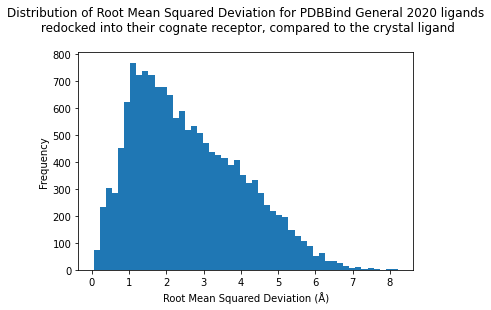

In [62]:
plt.hist(rmsds.values(), bins=50)
plt.gca().set(title='Distribution of Root Mean Squared Deviation for PDBBind General 2020 ligands\n redocked into their cognate receptor, compared to the crystal ligand\n',
              ylabel='Frequency', 
              xlabel = 'Root Mean Squared Deviation (Å)');

In [63]:
casf_rmsds = {}

for p in casf_pdbs:
    try:
        all_poses = SDMolSupplier(f'../redocked_pdbbind_2020_general/{p}_redocking-results.sdf')
        best_pose = all_poses[0]
        crystal_pose = next(Chem.SDMolSupplier(f'../pdbbind_2020_general/{p}/{p}_ligand.sdf'))
        if crystal_pose == None:
            crystal_pose = Chem.MolFromMol2File(f'../pdbbind_2020_general/{p}/{p}_ligand.mol2', removeHs=False)
        casf_rmsds[p] = AlignMol(best_pose, crystal_pose, maxIters=0)
    except:
        print(p)

# {p: rmsds[p] for p in casf_pdbs}

RDKit ERROR: [06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 17 18 20 21 22
[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 17 18 20 21 22

[06:28:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9

RDKit ERROR: 
RDKit ERROR: [06:28:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:28:07] ERROR: Could not sanitize molecule ending on line 69
[06:28:07] ERROR: Could not sanitize molecule ending on line 69
RDKit ERROR: [06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:28:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:28:07] ERROR: Could not sanitize molecule ending on line 90
[06:28:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9

[06:28:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

[06:28:07] ERROR: Could not sanitize molecule ending on line 90
RDKit ERROR:

RDKit ERROR: [06:28:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:28:08] Can't kekulize mol.  Unkekulized atoms: 34 35 36 37 38
RDKit ERROR: 
RDKit ERROR: [06:28:08] ERROR: Could not sanitize molecule ending on line 127
[06:28:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 17 18 19

[06:28:08] Can't kekulize mol.  Unkekulized atoms: 34 35 36 37 38

[06:28:08] ERROR: Could not sanitize molecule ending on line 127
RDKit ERROR: [06:28:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 34 35 36 37 38
RDKit ERROR: 
RDKit ERROR: [06:28:08] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:28:08] ERROR: Could not sanitize molecule ending on line 72
RDKit ERROR: [06:28:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[06:28:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 34 35 36 37 38

[06:28:08] Can't kekulize mol.  Unkekulized atoms: 2 3 4 

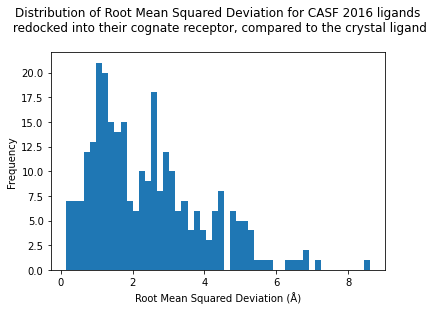

In [64]:
plt.hist(casf_rmsds.values(), bins=50)
plt.gca().set(title='Distribution of Root Mean Squared Deviation for CASF 2016 ligands\n redocked into their cognate receptor, compared to the crystal ligand\n',
              ylabel='Frequency', 
              xlabel = 'Root Mean Squared Deviation (Å)');

In [76]:
print(len(casf_rmsds.values()))

285


# Crossdocking analysis

In [6]:
casf_pdbs = []
with open('casf_2016_ids.txt') as f:
    for line in f:
        casf_pdbs.append(line[:4])
print(len(casf_pdbs))
print(casf_pdbs[:10])

285
['1a30', '1bcu', '1bzc', '1c5z', '1e66', '1eby', '1g2k', '1gpk', '1gpn', '1h22']


In [7]:
casf_clusters = dict(pd.read_csv('casf_2016_clusters.csv', index_col='PDB code').T)

In [8]:
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

In [9]:
cluster_dict = {}

for p in casf_pdbs:  
    append_value(cluster_dict, casf_clusters[p.upper()]['Cluster ID'], p)

In [10]:
most_similiar_ligand_pdbs = pickle.load(open('casf_most_similiar_ligand_crossdock_dict', 'rb'))
least_similiar_ligand_pdbs = pickle.load(open('casf_least_similiar_ligand_crossdock_dict', 'rb'))
most_similiar_structure_pdbs = pickle.load(open('casf_most_similiar_crossdock_dict', 'rb'))
least_similiar_structure_pdbs = pickle.load( open('casf_least_similiar_crossdock_dict', 'rb'))

In [11]:
['most_structure', 'least_structure', 'most_ligand', 'least_ligand']

def align_crossdocks(t, dict_):
    for i in cluster_dict.keys():
        for p in cluster_dict[i]:
            q = dict_[p]
            crystal_protein_path = f'../pdbbind_2020_general/{p}/{p}_protein_cleaned.pdb'
            cross_docked_ligand_path = f'../pdbbind_2020_general/{p}/{p}_crossdocking_{t}_similiar_best_pose.sdf'
            cross_docked_protein_path = f'../pdbbind_2020_general/{q}/{q}_protein_cleaned.pdb'
            for x in crystal_protein_path, cross_docked_ligand_path, cross_docked_protein_path:
                cmd.load(x)
            cmd.create('cross_docked',  cross_docked_protein_path.split('/')[-1][:-4] + ' + ' + cross_docked_ligand_path.split('/')[-1][:-4])
            cmd.select('cross_docked_only_protein', 'cross_docked & polymer.protein')
            cmd.align('cross_docked_only_protein', crystal_protein_path.split('/')[-1][:-4])
            cmd.save(f'../pdbbind_2020_general/{p}/{p}_crossdocking_{t}_similiar_best_pose_aligned_complex.pdb', 'cross_docked')
            cmd.delete('all')
    return None

In [39]:
align_crossdocks('most_structure', most_similiar_structure_pdbs)
align_crossdocks('least_structure', least_similiar_structure_pdbs)
align_crossdocks('most_ligand', most_similiar_ligand_pdbs)
align_crossdocks('least_ligand', least_similiar_ligand_pdbs)


 Matrix: Warning: no convergence (0.00000010<2120356.75000000 after 1000 iterations).
 Matrix: Warning: no convergence (0.00000010<2670120.25000000 after 1000 iterations).
 Matrix: Warning: no convergence (0.00000010<2120356.75000000 after 1000 iterations).
 Matrix: Warning: no convergence (0.00000010<2670120.25000000 after 1000 iterations).


In [40]:
def get_ligand_for_alignment(t, dict_):
    for p in casf_pdbs:
        file = open(f'../pdbbind_2020_general/{p}/{p}_crossdocking_{t}_similiar_best_pose_aligned_ligand.pdb', "w")
        file.close()
        with open(f'../pdbbind_2020_general/{p}/{p}_crossdocking_{t}_similiar_best_pose_aligned_complex.pdb', 'r') as f:
            for line in f.readlines():
                if 'UNK' in line:
                    file = open(f'../pdbbind_2020_general/{p}/{p}_crossdocking_{t}_similiar_best_pose_aligned_ligand.pdb', "a")
                    file.write(line)
                    file.close()

In [41]:
get_ligand_for_alignment('most_structure', most_similiar_structure_pdbs)
get_ligand_for_alignment('least_structure', least_similiar_structure_pdbs)
get_ligand_for_alignment('most_ligand', most_similiar_ligand_pdbs)
get_ligand_for_alignment('least_ligand', least_similiar_ligand_pdbs)

In [42]:
from rdkit.Chem import AllChem

            
def get_rmsd_from_alignment(t, dict_):
    failure = []
    rmsds = {}
    for i in cluster_dict.keys():
        for p in cluster_dict[i]:
            try:
                q = dict_[p]
                best_pose = rdkit.Chem.rdmolfiles.MolFromPDBFile(f'../pdbbind_2020_general/{p}/{p}_crossdocking_{t}_similiar_best_pose_aligned_ligand.pdb')
                crystal_pose = next(Chem.SDMolSupplier(f'../pdbbind_2020_general/{p}/{p}_ligand.sdf'))
                if crystal_pose == None:
                    crystal_pose = Chem.MolFromMol2File(f'../pdbbind_2020_general/{p}/{p}_ligand.mol2', removeHs=True)
                best_pose_cleaned = AllChem.AssignBondOrdersFromTemplate(crystal_pose, best_pose)
                rmsds[p] = AlignMol(best_pose_cleaned, crystal_pose, maxIters=0)
            except:
                failure.append(p)
                
    return rmsds, failure

In [48]:
rmsds_most_structure = get_rmsd_from_alignment('most_structure', most_similiar_structure_pdbs)[0]
rmsds_least_structure = get_rmsd_from_alignment('least_structure', least_similiar_structure_pdbs)[0]
rmsds_most_ligand = get_rmsd_from_alignment('most_ligand', most_similiar_ligand_pdbs)[0]
rmsds_least_ligand = get_rmsd_from_alignment('least_ligand', least_similiar_ligand_pdbs)[0]

RDKit ERROR: [06:21:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 16 17 18
[06:21:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 16 17 18

[06:25:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

RDKit ERROR: 
RDKit ERROR: [06:25:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
RDKit ERROR: 
RDKit ERROR: [06:25:57] ERROR: Could not sanitize molecule ending on line 90
[06:25:57] ERROR: Could not sanitize molecule ending on line 90
RDKit ERROR: [06:25:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11
[06:25:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9 10 11

[06:25:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9

RDKit ERROR: 
RDKit ERROR: [06:25:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:25:57] ERROR: Could not sanitize molecule ending on line 69
[06:25:57] ERROR: Could not sanitize molecule ending on line 69
RDKi

RDKit ERROR: [06:25:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 13 14 15 19
[06:25:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 13 14 15 19

[06:25:57] Can't kekulize mol.  Unkekulized atoms: 1 5 6 7 8 20 21 22 23

RDKit ERROR: 
RDKit ERROR: [06:25:57] Can't kekulize mol.  Unkekulized atoms: 1 5 6 7 8 20 21 22 23
RDKit ERROR: 
RDKit ERROR: [06:25:57] ERROR: Could not sanitize molecule ending on line 84
[06:25:57] ERROR: Could not sanitize molecule ending on line 84
RDKit ERROR: [06:25:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 5 6 7 8 20 21 22 23
[06:25:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 5 6 7 8 20 21 22 23

[06:25:58] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13

RDKit ERROR: 
RDKit ERROR: [06:25:58] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [06:25:58] ERROR: Could not sanitize molecule ending on line 52
[06:25:58] ERROR: Could not sanitize molecule ending on line 52
RDKit WARN

RDKit ERROR: [06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16

[06:25:58] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

RDKit ERROR: 
RDKit ERROR: [06:25:58] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [06:25:58] ERROR: Could not sanitize molecule ending on line 152
[06:25:58] ERROR: Could not sanitize molecule ending on line 152
RDKit ERROR: [06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8

[06:25:58] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 6 7 8 9 10

RDKit ERROR: 
RDKit ERROR: [06:25:58] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:25:58] ERROR: Could not sanitize molecule ending on line 59
[06:25:58] ERROR: Could not sanitize molecule ending on line 59
RDKit WA

RDKit ERROR: [06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 17 18 19
[06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 17 18 19

[06:25:58] Can't kekulize mol.  Unkekulized atoms: 34 35 36 37 38

RDKit ERROR: 
RDKit ERROR: [06:25:58] Can't kekulize mol.  Unkekulized atoms: 34 35 36 37 38
RDKit ERROR: 
RDKit ERROR: [06:25:58] ERROR: Could not sanitize molecule ending on line 127
[06:25:58] ERROR: Could not sanitize molecule ending on line 127
RDKit ERROR: [06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 34 35 36 37 38
[06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 34 35 36 37 38

[06:25:58] Can't kekulize mol.  Unkekulized atoms: 0 3 4 27 29

RDKit ERROR: 
RDKit ERROR: [06:25:58] Can't kekulize mol.  Unkekulized atoms: 0 3 4 27 29
RDKit ERROR: 
RDKit ERROR: [06:25:58] ERROR: Could not sanitize molecule ending on line 137
[06:25:58] ERROR: Could not sanitize molecule ending on line 137
RDKit WARNING: 6:25:58] 

RDKit WARNING: found - picking one
found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: Mo

RDKit ERROR: [06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 12 13
[06:25:58] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 12 13

[06:25:58] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19

RDKit ERROR: 
RDKit ERROR: [06:25:58] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
RDKit ERROR: 
RDKit ERROR: [06:25:58] ERROR: Could not sanitize molecule ending on line 98
[06:25:58] ERROR: Could not sanitize molecule ending on line 98
RDKit WARNING:  one matching pattern found - picking one
 one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern found - picking one
[06:25:58] WARNING: More than one matching pattern fo

RDKit ERROR: [06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 6 7 8 9 10
[06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 6 7 8 9 10

[06:25:59] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

RDKit ERROR: 
RDKit ERROR: [06:25:59] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [06:25:59] ERROR: Could not sanitize molecule ending on line 60
[06:25:59] ERROR: Could not sanitize molecule ending on line 60
RDKit ERROR: [06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

[06:25:59] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12

RDKit ERROR: 
RDKit ERROR: [06:25:59] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [06:25:59] ERROR: Could not sanitize molecule ending on line 48
[06:25:59] ERROR: Could not sanitize molecule ending on line 48
RDKit ERROR: [06:2

[06:25:59] ERROR: Could not sanitize molecule ending on line 102
RDKit ERROR: [06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8 9 10 11 12 13 14
[06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 5 6 7 8 9 10 11 12 13 14

[06:25:59] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15 16 17

RDKit ERROR: 
RDKit ERROR: [06:25:59] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [06:25:59] ERROR: Could not sanitize molecule ending on line 101
[06:25:59] ERROR: Could not sanitize molecule ending on line 101
RDKit ERROR: [06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [06:25:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 16 17 18
RDKit ERROR: 
RDKit ERROR: [06:25:59] ERROR: Could not sanitize molecule ending on line 80
[06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15 16 17

[06:25:59] Can't kek

[06:25:59] ERROR: Could not sanitize molecule ending on line 106
RDKit WARNING: matching pattern found - picking one
matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - pickin

RDKit ERROR: [06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19
[06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17 18 19

[06:25:59] Can't kekulize mol.  Unkekulized atoms: 0 4 14 15 16 17 18 19 20

RDKit ERROR: 
RDKit ERROR: [06:25:59] Can't kekulize mol.  Unkekulized atoms: 0 4 14 15 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [06:25:59] ERROR: Could not sanitize molecule ending on line 90
[06:25:59] ERROR: Could not sanitize molecule ending on line 90
RDKit ERROR: [06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 4 14 15 16 17 18 19 20
[06:25:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 4 14 15 16 17 18 19 20

[06:25:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

RDKit ERROR: 
RDKit ERROR: [06:25:59] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [06:25:59] ERROR: Could not sanitize molecule ending on line 56
[06:25:59] ERROR: Could not sanitize molecul

RDKit WARNING: cking one
cking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching pattern found - picking one
[06:25:59] WARNING: More than one matching

RDKit WARNING: ing pattern found - picking one
ing pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking on

RDKit ERROR: [06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [06:26:00] Can't kekulize mol.  Unkekulized atoms: 9 10 14 15 16
RDKit ERROR: 
RDKit ERROR: [06:26:00] ERROR: Could not sanitize molecule ending on line 92
[06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 8 9 10

[06:26:00] Can't kekulize mol.  Unkekulized atoms: 9 10 14 15 16

[06:26:00] ERROR: Could not sanitize molecule ending on line 92
RDKit ERROR: [06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 14 15 16
RDKit ERROR: 
RDKit ERROR: [06:26:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 8 10
RDKit ERROR: 
RDKit ERROR: [06:26:00] ERROR: Could not sanitize molecule ending on line 111
[06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 9 10 14 15 16

[06:26:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 8 10

[06:26:00] ERROR: Could not sanitize molecule ending on line 111
RDKit ERROR: [06:26:00] ERROR: Can't

RDKit ERROR: [06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 9 11 16 19
[06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 9 11 16 19

[06:26:00] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16

RDKit ERROR: 
RDKit ERROR: [06:26:00] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
RDKit ERROR: 
RDKit ERROR: [06:26:00] ERROR: Could not sanitize molecule ending on line 71
[06:26:00] ERROR: Could not sanitize molecule ending on line 71
RDKit WARNING:  one
 one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found - picking one
[06:26:00] WARNING: More than one matching pattern found -

RDKit ERROR: [06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
[06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20

[06:26:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 10

RDKit ERROR: 
RDKit ERROR: [06:26:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 10
RDKit ERROR: 
RDKit ERROR: [06:26:00] ERROR: Could not sanitize molecule ending on line 65
[06:26:00] ERROR: Could not sanitize molecule ending on line 65
RDKit ERROR: [06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 10
[06:26:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 10

[06:26:00] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21

RDKit ERROR: 
RDKit ERROR: [06:26:00] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [06:26:00] ERROR: Could not sanitize molecule ending on line 131
[06:26:00] ERROR: Could not sanitize molecule ending on line 131
RDKit ERROR: [06:26:00] ERROR: Can't kekulize mol.  Unkekulized 

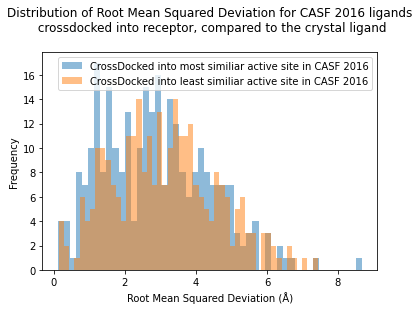

In [86]:
plt.hist(rmsds_most_structure.values(), bins=50, alpha=0.5, label='CrossDocked into most similiar active site in CASF 2016')
plt.hist(rmsds_least_structure.values(), bins=50, alpha=0.5, label = 'CrossDocked into least similiar active site in CASF 2016')
plt.legend()
plt.gca().set(title='Distribution of Root Mean Squared Deviation for CASF 2016 ligands\n crossdocked into receptor, compared to the crystal ligand\n',
              ylabel='Frequency', 
              xlabel = 'Root Mean Squared Deviation (Å)');

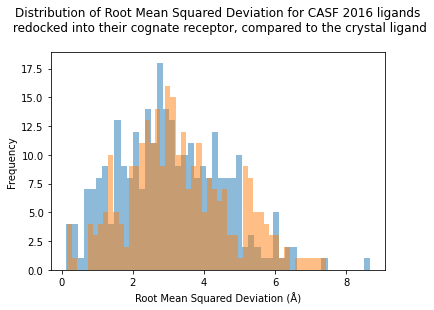

In [80]:
plt.hist(rmsds_most_ligand.values(), bins=50, alpha=0.5)
plt.hist(rmsds_least_ligand.values(), bins=50, alpha=0.5)
plt.gca().set(title='Distribution of Root Mean Squared Deviation for CASF 2016 ligands\n redocked into their cognate receptor, compared to the crystal ligand\n',
              ylabel='Frequency', 
              xlabel = 'Root Mean Squared Deviation (Å)');